In [1]:
import pandas as pd

# Load the dataset (replace 'your_dataset.csv' with your actual filename)
df = pd.read_csv("Rainfall_data.csv")

In [2]:
import pandas as pd

# Define the file name
file_name = "Rainfall_data.csv"

# Load the dataset
rainfall_df = pd.read_csv(file_name)

# Display the first few rows of the dataset
print(rainfall_df.head())

   Year  Month  Day  Specific Humidity  Relative Humidity  Temperature  \
0  2000      1    1               8.06              48.25        23.93   
1  2000      2    1               8.73              50.81        25.83   
2  2000      3    1               8.48              42.88        26.68   
3  2000      4    1              13.79              55.69        22.49   
4  2000      5    1              17.40              70.88        19.07   

   Precipitation  
0           0.00  
1           0.11  
2           0.01  
3           0.02  
4         271.14  


In [3]:
import pandas as pd

# Define the file name
file_name = "Rainfall_data.csv"

# Load the dataset
rainfall_df = pd.read_csv(file_name)

# Display data types
print("Data Types:")
print(rainfall_df.dtypes)

# Check for missing values
print("\nMissing Values:")
print(rainfall_df.isnull().sum())

Data Types:
Year                   int64
Month                  int64
Day                    int64
Specific Humidity    float64
Relative Humidity    float64
Temperature          float64
Precipitation        float64
dtype: object

Missing Values:
Year                 0
Month                0
Day                  0
Specific Humidity    0
Relative Humidity    0
Temperature          0
Precipitation        0
dtype: int64


In [4]:
# Convert specific columns to integer (if needed)
columns_to_convert = ['Year', 'Month', 'Day']
rainfall_df[columns_to_convert] = rainfall_df[columns_to_convert].astype('Int64', errors='ignore')

# Check data types after conversion
print(rainfall_df.dtypes)

Year                   Int64
Month                  Int64
Day                    Int64
Specific Humidity    float64
Relative Humidity    float64
Temperature          float64
Precipitation        float64
dtype: object


In [5]:
# Statistical summary
summary = rainfall_df.describe()

# Display the summary
print(summary)

              Year       Month    Day  Specific Humidity  Relative Humidity  \
count   252.000000  252.000000  252.0         252.000000         252.000000   
mean   2010.000000    6.500000    1.0          14.416746          67.259524   
std       6.067351    3.458922    0.0           4.382599          17.307101   
min    2000.000000    1.000000    1.0           5.740000          34.690000   
25%    2005.000000    3.750000    1.0          10.010000          51.845000   
50%    2010.000000    6.500000    1.0          15.200000          66.655000   
75%    2015.000000    9.250000    1.0          18.875000          84.610000   
max    2020.000000   12.000000    1.0          20.570000          92.310000   

       Temperature  Precipitation  
count   252.000000     252.000000  
mean     16.317262     206.798929  
std       6.584842     318.093091  
min       4.730000       0.000000  
25%      10.865000       0.402500  
50%      16.915000      11.495000  
75%      22.115000     353.200000  


In [6]:
import pandas as pd

# Assuming rainfall_df is your DataFrame
# If not, replace rainfall_df with your DataFrame name

# Calculate IQR for each column
Q1 = rainfall_df.quantile(0.25)
Q3 = rainfall_df.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold to identify outliers
threshold = 1.5

# Identify outliers
outliers = ((rainfall_df < (Q1 - threshold * IQR)) | (rainfall_df > (Q3 + threshold * IQR)))

# Count the number of outliers in each column
outlier_counts = outliers.sum()

# Display the count of outliers for each column
print("Outlier Counts:")
print(outlier_counts)

Outlier Counts:
Year                  0
Month                 0
Day                   0
Specific Humidity     0
Relative Humidity     0
Temperature           0
Precipitation        17
dtype: int64


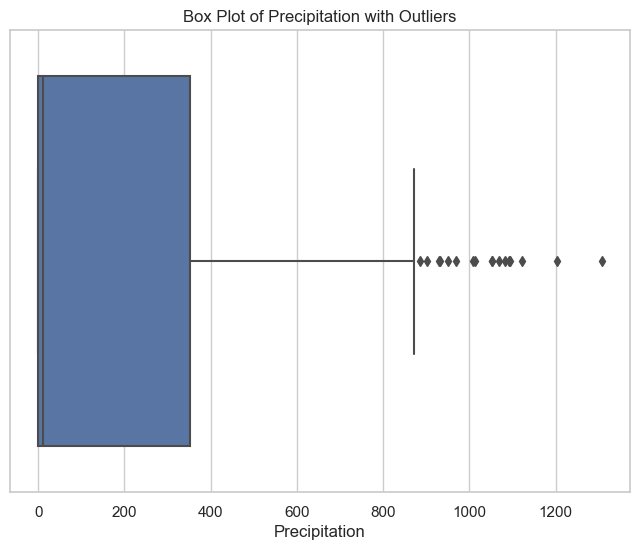

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a box plot for 'Precipitation'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Precipitation'])

# Set the title and labels
plt.title('Box Plot of Precipitation with Outliers')
plt.xlabel('Precipitation')

# Show the plot
plt.show()

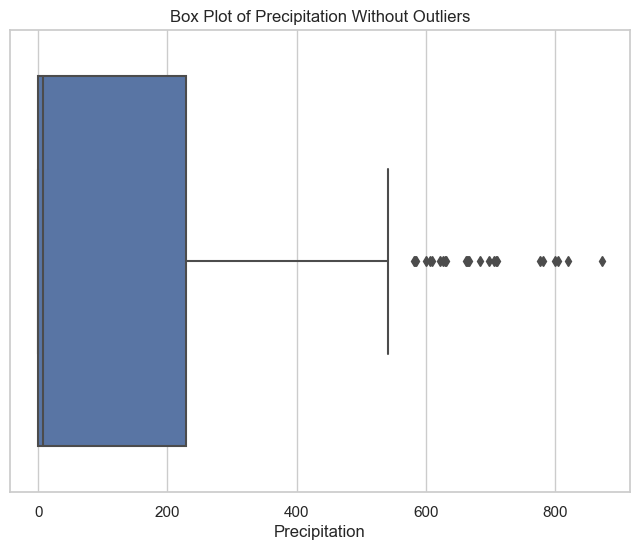

In [8]:
# Calculate the IQR for 'Precipitation'
Q1 = df['Precipitation'].quantile(0.25)
Q3 = df['Precipitation'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['Precipitation'] >= lower_bound) & (df['Precipitation'] <= upper_bound)]

# Visualize the box plot after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_no_outliers['Precipitation'])
plt.title('Box Plot of Precipitation Without Outliers')
plt.xlabel('Precipitation')
plt.show()